In [ ]:
# Lab 0 - Python and Jupyter notebook introduction
# Alex Zeng

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Warm-up Exercises 

Try the following commands on your jupyter notebook or python editor and see what output they produce.

In [5]:
a = 1 + 5
b = 2
c = a + b
print(a / b)
print(a // b)
print(a - b)
print(a * b)
print(a**b)

3.0
3
4
12
36


In [8]:
a = np.array([[3, 1],
              [1, 3]])
b = np.array([[3],
              [5]])
print(a * b)

# physical meaning of dot product: how much do they overlap
print(np.dot(a, b))
print(np.dot(b.T, a))

c = a**(-1.0)
print(c * a)

[[ 9  3]
 [ 5 15]]
[[14]
 [18]]
[[14 18]]
[[1. 1.]
 [1. 1.]]


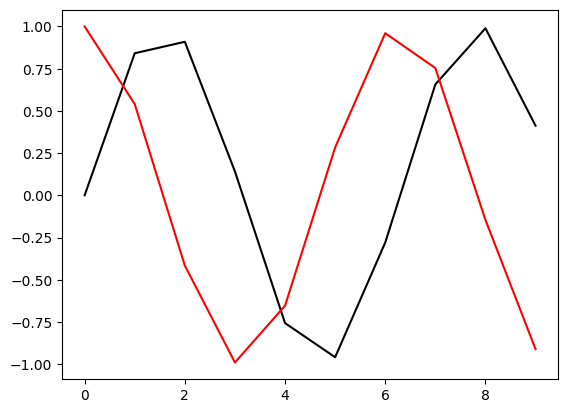

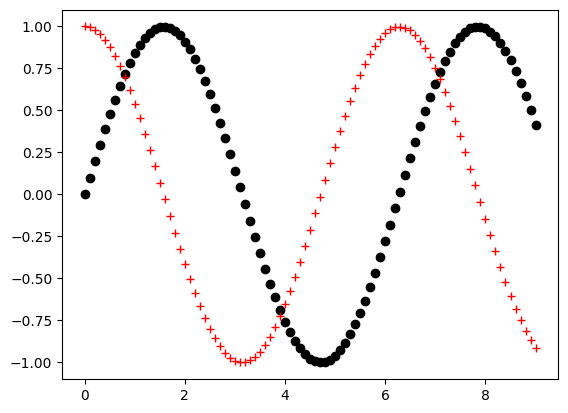

In [12]:
t = np.arange(10) # generate set of numbers 

g = np.sin(t)
h = np.cos(t)
plt.figure()

plt.plot(t, g, 'k', t, h, 'r');

t = np.arange(0, 9.1, 0.1)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'ok', t, h, '+r');

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[1.00230524e+00 1.78186583e+01 3.16774344e+02 5.63151182e+03
 1.00115196e+05 1.77981556e+06 3.16409854e+07 5.62503203e+08
 1.00000000e+10]
[1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01]


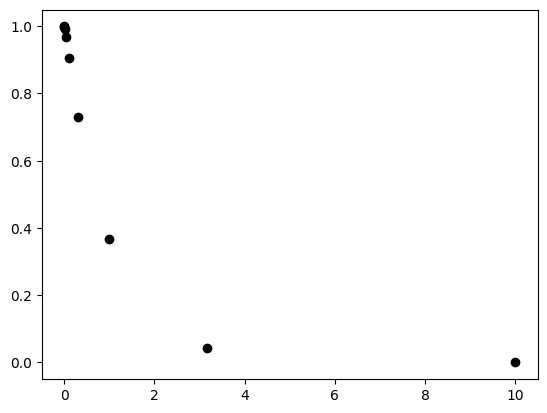

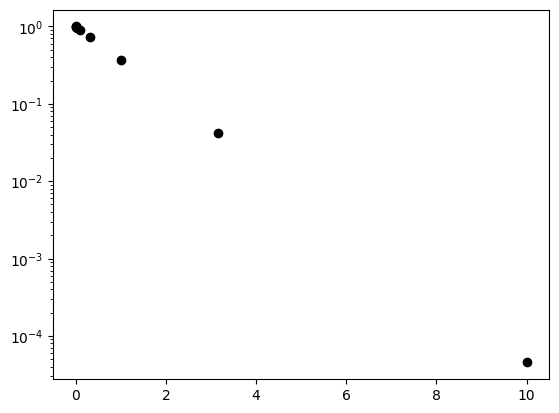

In [15]:
#linspace: Return evenly spaced numbers over a specified interval
t = np.linspace(0, 10, 20)
print(t)
t = np.logspace(0.001, 10, 9)
print(t)
t = np.logspace(-3, 1, 9)
print(t)
y = np.exp(-t)

plt.figure()
plt.plot(t, y, 'ok')
plt.figure()
plt.semilogy(t, y, 'ok') # semilogy: Make a plot with log scaling

# Integration Function

Here is a more complicated function that computes the integral $y(x)$ with interval $dx$:

$$c = \int y(x) dx \sim \sum_{i=1}^N y_i dx_i .$$

It can deal with both cases of even and uneven sampling.

In [4]:
def integral(y, dx):
    # function c = integral(y, dx)
    # To numerically calculate integral of vector y with interval dx:
    # c = integral[ y(x) dx]
    
    # ------ This is a demonstration program ------
    n = len(y) # Get the length of vector y
    nx = len(dx) if np.iterable(dx) else 1 # Check whether or not an object can be iterated over
    c = 0 # initialize c because we are going to use it
    # dx is a scalar <=> x is equally spaced
    
    if nx == 1: # ’==’, equal to, as a condition
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx / 2
            
    # x is not equally spaced, then length of dx has to be n-1
    elif nx == n-1:
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx[k-1] / 2
    # If nx is not 1 or n-1, display an error messege and terminate program
    else:
        print('Lengths of y and dx do not match!')
    return c


Use this function (`integral`) to compute $\int_0^{\pi/2} \cos(t) dt$
with an evenly sampled time series.

t:   [0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633]
dt:  0.17453292519943295
0.9974602317917262


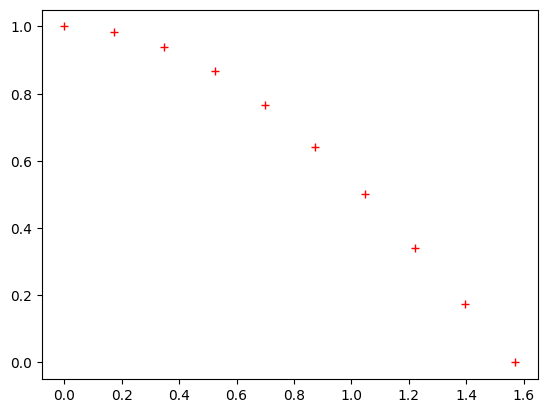

In [24]:
# number of samples
nt = 10
# generate time vector
t = np.linspace(0, np.pi/2, nt)
print("t:  ", t)

# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.cos(t)
plt.plot(t, y, 'r+')
c = integral(y, dt)

print("dt: ", dt)
print(c)

## Part 1

First plot $y(t)$. Is the output $c$ value what you are expecting for
$\int_0^{\pi/2} \cos(t) dt$? How can you improve the accuracy of your computation?

### Part 1 Solution

The plot for $\int_0^{\pi/2} \cos(t) dt$ has been plotted above. 
The exact output for this integral for this integral should be 1, and the given algorithemn outputed 0.9974602317917262, which is 0.2% off from the expected solution. 
To improve the accuracy, we can try to increase the number of samples. For example, if we change the number of samples, nt, to 100, as shown below, the calculated solution for this integral becomes 0.00002097924. Which is only 0.002% off from the actual solution, now we have a calculated solution that is much closer to the actual solution.

0.999979020750832


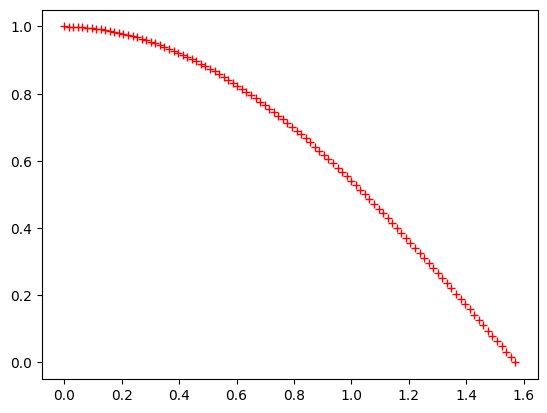

In [29]:
# number of samples
nt = 100
# generate time vector
t = np.linspace(0, np.pi/2, nt)

# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.cos(t)
plt.plot(t, y, 'r+')
c = integral(y, dt)
print(c)

## Part 2

For an unevenly spaced time series that depicts $\sin[(2 \pi (t+ 3t^2)]$ (so-called chirp function),
compute $\int_0^1 \sin[(2 \pi (t+ 3t^2)] dt$.

0.08673999688870114


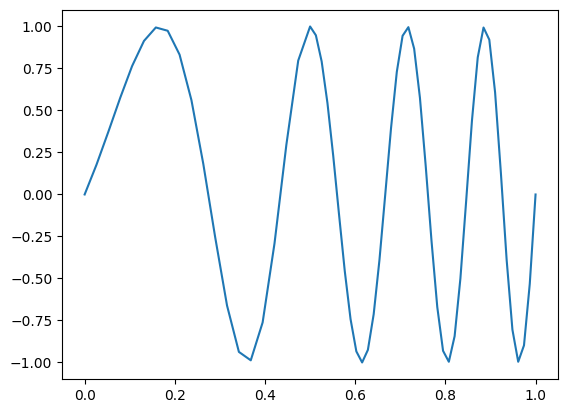

In [32]:
nt = 20
# sampling between [0,0.5]
t1 = np.linspace(0, 0.5, nt)
# double sampling between [0.5,1]
t2 = np.linspace(0.5, 1, 2*nt)
# concatenate time vector
t = np.concatenate((t1[:-1], t2))
# compute y values (f=2t)
y = np.sin(2 * np.pi * (t + 3*t**2))
plt.plot(t, y)
# compute sampling interval vector
dt = t[1:] - t[:-1]
c = integral(y, dt)
print(c)

Show your plot of $y(t)$ for $nt = 50$. Try different $nt$ values and see
how the integral results change. Write a `for` loop around the statements above to try
a series of $nt$ values (e.g, 50, 100, 500, 1000, 5000) and generate a plot of $c(nt)$.
What value does $c$ converge to after using larger and larger $nt$? (Please include your
modified Python code.)

### Part 2 Solution:

For nt = 50

c when nt = 50:  0.08653434800479506


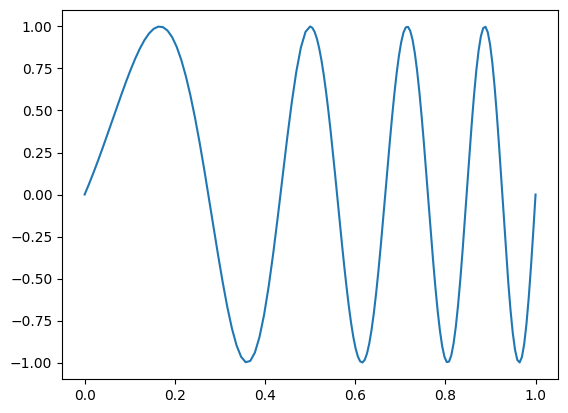

In [87]:
nt = 50
# sampling between [0,0.5]
t1 = np.linspace(0, 0.5, nt)
# double sampling between [0.5,1]
t2 = np.linspace(0.5, 1, 2*nt)
# concatenate time vector
t = np.concatenate((t1[:-1], t2))
# compute y values (f=2t)
y = np.sin(2 * np.pi * (t + 3*t**2))
plt.plot(t, y)
# compute sampling interval vector
dt = t[1:] - t[:-1]
c = integral(y, dt)
print("c when nt = 50: ", c)

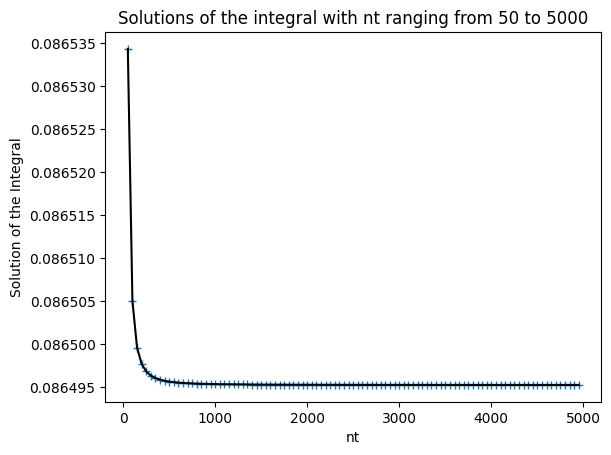

[0.08653434800479506, 0.08650505229145565, 0.08649961742412386, 0.08649771345317721, 0.08649683170724073, 0.08649635256348019, 0.08649606358225775, 0.08649587598725855, 0.08649574735415808, 0.08649565533307149, 0.08649558724148908, 0.08649553544822129, 0.08649549513823061, 0.08649546315168713, 0.08649543734532114, 0.08649541622380284, 0.08649539871815055, 0.0864953840477555, 0.08649537163183177, 0.08649536103103381, 0.08649535190804966, 0.08649534400043239, 0.08649533710150853, 0.08649533104674012, 0.08649532570381885, 0.08649532096537915, 0.08649531674355783, 0.08649531296589633, 0.08649530957220693, 0.08649530651216039, 0.08649530374341424, 0.08649530123013555, 0.0864952989418336, 0.08649529685243787, 0.08649529493954698, 0.08649529318382358, 0.08649529156851088, 0.08649529007902682, 0.08649528870263413, 0.08649528742816644, 0.08649528624580369, 0.08649528514687921, 0.08649528412372223, 0.08649528316952493, 0.08649528227822775, 0.08649528144442042, 0.08649528066326258, 0.086495279930

In [41]:
all_nt = np.arange(50, 5000, 50)
c = []
x = []

for nt in all_nt:
    # sampling between [0,0.5]
    t1 = np.linspace(0, 0.5, int(nt))
    # double sampling between [0.5,1]
    t2 = np.linspace(0.5, 1, 2*int(nt))
    # concatenate time vector
    t = np.concatenate((t1[:-1], t2))
    # compute y values (f=2t)
    y = np.sin(2 * np.pi * (t + 3*t**2))
    # plt.plot(t, y)
    # compute sampling interval vector
    dt = t[1:] - t[:-1]
    c.append(integral(y, dt))
    x.append(nt)
    # print("nt = : ",nt, "   c = ", c)
    
plt.plot(x, c, "+")
plt.plot(x, c, "k")
plt.title("Solutions of the integral with nt ranging from 50 to 5000")
plt.xlabel("nt")
plt.ylabel("Solution of the Integral")
plt.show()

print(c)

By inspecting the data and graph above, we can conclude that c is converging toward 0.086496. 

# Accuracy of Sampling

Let us sample the function $g(t) = \cos(2 \pi f t)$ at sampling interval $dt = 1$, for frequency values of
$f = 0, 0.25, 0.5, 0.75, 1.0$ hertz.

In each case, plot on the screen the points of the resulting time series (as isolated red crosses) to
see how well it approximates $g(t)$ (plotted as a blue-dotted line, try a very small $dt$ fine
sampling). Submit only plots for frequencies of $0.25$ and $0.75$
Hertz, use xlabel, ylabel, title commands to annotate each plot.

For each frequency that you investigated, do you think the sampling time series is a fair representation of
the original time series $g(t)$? 

What is the apparent frequency for the sampling time series? (Figure out
after how many points ($N$) the series repeats itself, then the apparent frequency = $1/(N*dt)$. You can do this either
mathematically or by inspection. A flat time series has apparent frequency = 0.) 

Can you guess with a
sampling interval of $dt = 1$, what is the maximum frequency $f$ of $g(t)$
such that it can be fairly represented by the discrete time series? (Please attach your Python code.)

### All code, calculation and graphs for the Accuracy of Sampling Section: 

In [88]:
# to show all graphs (personal debugging use)
f_all = [0, 0.25, 0.5, 0.75, 1.0]

In [82]:
# to only show graphs with f = 0.25 or 0.75 (as required in the question)
f_all = [0.25, 0.75]

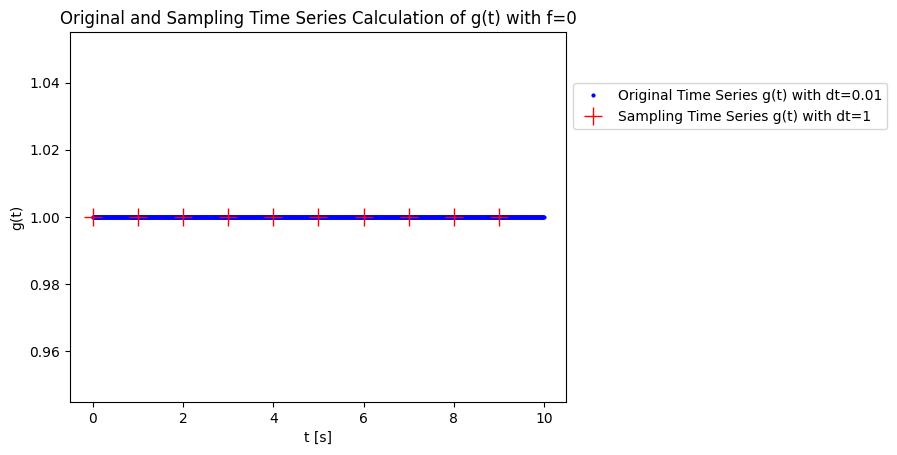

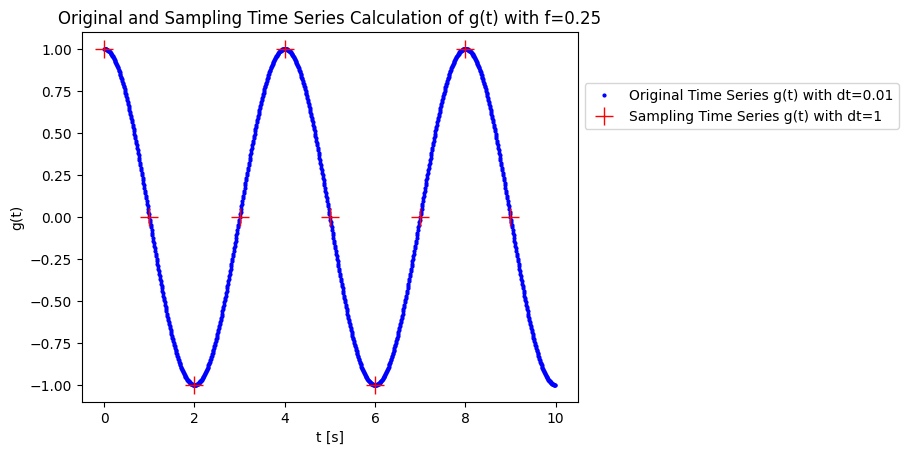

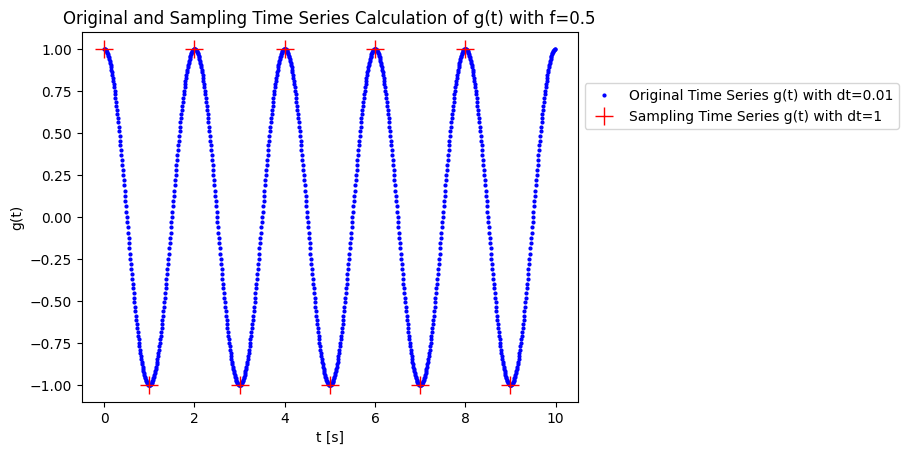

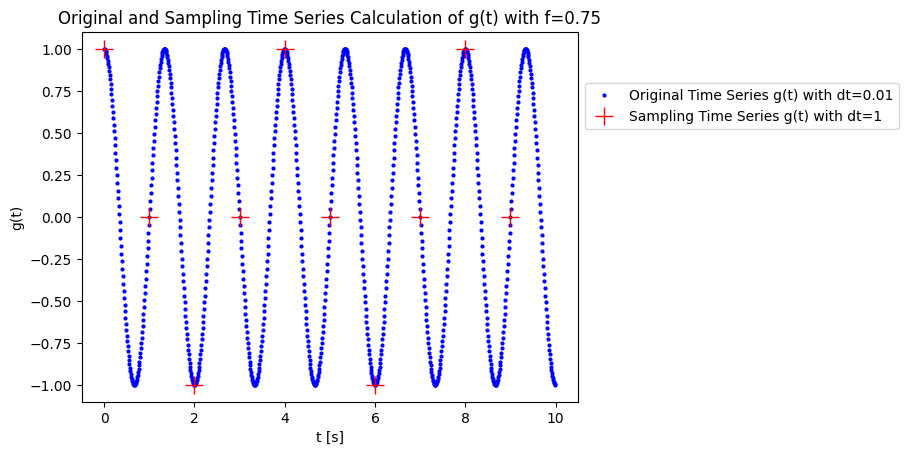

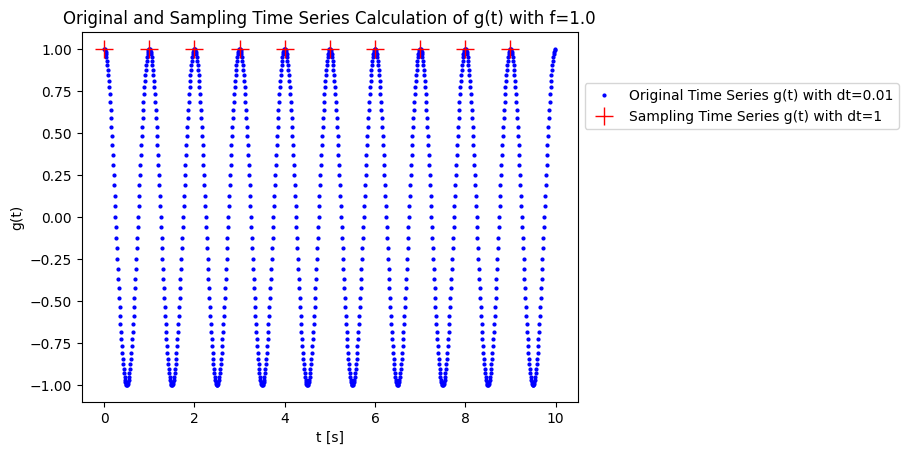

In [89]:
dt = 1
t = np.arange(0, 10, dt)
t_fine = np.arange(0, 10, 0.01)

for f in f_all:
    g = np.cos(2*np.pi*f*t)
    g_fine = np.cos(2*np.pi*f*t_fine)
    
    # plotting a line plot after changing it's width and height
    plt.plot(t_fine, g_fine, "ob", markersize=2, label="Original Time Series g(t) with dt=0.01")
    plt.plot(t, g, "+r", markersize=13, label="Sampling Time Series g(t) with dt=1")
    plt.title("Original and Sampling Time Series Calculation of g(t) with f="+ str(f))
    plt.xlabel("t [s]")
    plt.ylabel("g(t)")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
    plt.show()

#### Apparent Frequency Calculation:

| f | N | Aparent Frequency|
| --- | --- | --- |
| 0 | $\infty$ | 0 |
| 0.25 | 4 | 0.25 |
| 0.50 | 2 | 0.50 |
| 0.75 | 4 | 0.25 |
| 1.00 | $\infty$ | 0 |

### Observation from Accuracy of Sampling:

If we only look at the f=0.25 graph, it is easy to assume that the sampling time series is not a bad representation of the Original Time Series g(t). But once you start looking at f at other frequencies, such as at f=0.25 or f=1, you will notice that the Sampling Time Series does not accurately represent the Original Time Series. If we plot a line of best fit using only the Sampling Time Series, the final graph would not look like the Original Time Series.

By inspection, the apparent frequency when f=0.25 is 1/4, whereas the apparent frequency when f=0.75 is also 0.25. Based on all the graphs generated with different f (0, 0.25, 0.5, 0.75, 1.0), then the max frequency f of g(t) such that it can be fairly represented by the discrete time series is 0.5 since that's the last time when you see the elavation of the Original Time Series matches the Sampling Time Series. 


In [2]:
!pip3 install pandoc

In [3]:
!pip3 install nbconvert